Предложите метрику качества Вашей модели. Можно ли здесь использовать accuracy? Объясните свой выбор.

accuracy - плохо, будет завышена, т.к. классы сильно несбалансированы
Лучше использовать F1 score (и отдельно еще посмотреть на precision, recall)

In [1]:
from scipy.io import arff
data, meta = arff.loadarff('seismic-bumps.arff')

In [2]:
data

array([(b'a', b'a', b'N', 15180.,  48., -72., -72., b'a', 0., 0., 0., 0., 0., 0., 0., 0.,    0.,    0., b'0'),
       (b'a', b'a', b'N', 14720.,  33., -70., -79., b'a', 1., 0., 1., 0., 0., 0., 0., 0., 2000., 2000., b'0'),
       (b'a', b'a', b'N',  8050.,  30., -81., -78., b'a', 0., 0., 0., 0., 0., 0., 0., 0.,    0.,    0., b'0'),
       ...,
       (b'b', b'a', b'W', 26960., 540., 101., 112., b'a', 0., 0., 0., 0., 0., 0., 0., 0.,    0.,    0., b'0'),
       (b'a', b'a', b'W', 16130., 322.,   2.,   2., b'a', 0., 0., 0., 0., 0., 0., 0., 0.,    0.,    0., b'0'),
       (b'a', b'a', b'W', 12750., 235., -10., -10., b'a', 0., 0., 0., 0., 0., 0., 0., 0.,    0.,    0., b'0')],
      dtype=[('seismic', 'S1'), ('seismoacoustic', 'S1'), ('shift', 'S1'), ('genergy', '<f8'), ('gpuls', '<f8'), ('gdenergy', '<f8'), ('gdpuls', '<f8'), ('ghazard', 'S1'), ('nbumps', '<f8'), ('nbumps2', '<f8'), ('nbumps3', '<f8'), ('nbumps4', '<f8'), ('nbumps5', '<f8'), ('nbumps6', '<f8'), ('nbumps7', '<f8'), ('nbumps89

In [3]:
meta

Dataset: seismic-bumps
	seismic's type is nominal, range is ('a', 'b', 'c', 'd')
	seismoacoustic's type is nominal, range is ('a', 'b', 'c', 'd')
	shift's type is nominal, range is ('W', 'N')
	genergy's type is numeric
	gpuls's type is numeric
	gdenergy's type is numeric
	gdpuls's type is numeric
	ghazard's type is nominal, range is ('a', 'b', 'c', 'd')
	nbumps's type is numeric
	nbumps2's type is numeric
	nbumps3's type is numeric
	nbumps4's type is numeric
	nbumps5's type is numeric
	nbumps6's type is numeric
	nbumps7's type is numeric
	nbumps89's type is numeric
	energy's type is numeric
	maxenergy's type is numeric
	class's type is nominal, range is ('1', '0')

In [4]:
import pandas as pd
df = pd.DataFrame(data, columns=data.dtype.fields.keys())
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [5]:
df['class'] = df['class'].astype(int)

In [6]:
categorical_features = ['seismic', 'seismoacoustic', 'shift', 'ghazard']
from sklearn.preprocessing import LabelEncoder

transformers = {}
for feature_name in categorical_features:
    transformers[feature_name] = LabelEncoder()
    df[feature_name] = transformers[feature_name].fit_transform(df[feature_name])

df_oh = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [7]:
df_oh.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,...,nbumps89,energy,maxenergy,class,seismic_1,seismoacoustic_1,seismoacoustic_2,shift_1,ghazard_1,ghazard_2
0,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,14720.0,33.0,-70.0,-79.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2000.0,2000.0,0,0,0,0,0,0,0
2,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,28820.0,171.0,-23.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3000.0,3000.0,0,0,0,0,0,0,0
4,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
for col in df_oh.drop('class', 1).columns:
    ss = StandardScaler()
    df_oh[col] = ss.fit_transform(df_oh[[col]])

In [ ]:
#df_oh['class'][df_oh['class']==0] = 1
#df_oh['class'][df_oh['class']==1] = -1

In [9]:
X, y = df_oh.drop('class', 1), df_oh['class']

In [10]:
X.shape, y.shape

((2584, 20), (2584,))

In [11]:
y.sum()

170

Проверьте гипотезу компактности на этих данных. Какие методы машинного обучения тут могут хорошо работать?

tSNE, PCA

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [13]:
tsne = TSNE(random_state=17)
X_emb = TSNE(n_components=2).fit_transform(X)

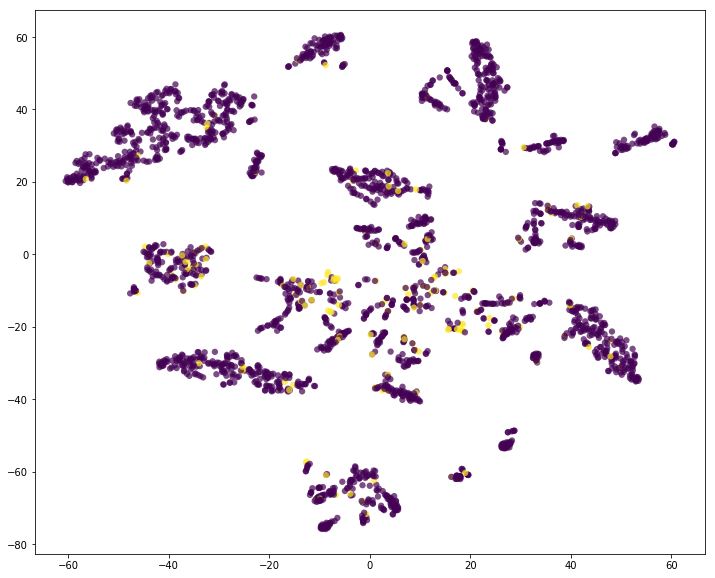

In [14]:
plt.figure(figsize=(12,10))
plt.scatter(X_emb[:, 0], X_emb[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            )#cmap=plt.cm.get_cmap('nipy_spectral', 10)
#plt.colorbar()

Обучите на данных любой классификатор. Хорошо ли он работает? Почему его качество может быть плохим в этой задаче?

У классификатора будет плохое качество, так как классы сильно разбалансированы 

In [30]:
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_emb_train, X_emb_test, X_train, X_test, y_train, y_test = train_test_split(X_emb, X, y, train_size=0.8)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
y_test[preds == 0].mean(), y_test[preds == 1].mean()

(0.06126482213438735, 0.09090909090909091)

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score

In [18]:
print('KNN:', 'f1:', (f1_score(preds, y_test)), 
      'precision', precision_score(preds, y_test),
     'recall', recall_score(preds, y_test))

KNN: f1: 0.046511627906976744 precision 0.03125 recall 0.09090909090909091


Ожидаемо, классификатор отработал хреново

Обучите методы поиска аномалий из занятия 6. Добейтесь наилучшего качества. Лучше ли оно, чем supervised-learning? Почему?

In [23]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=y_train.mean())
model.fit(X_train)
preds = model.predict(X_test)
y_pred = (1 - preds)/2
y_test[preds == 1].mean(), y_test[preds == -1].mean()

C:\Users\nepti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.05230125523012552, 0.1794871794871795)

In [27]:
print('IsolationForest:', 'f1:', (f1_score(y_pred, y_test)), 
      'precision', precision_score(y_pred, y_test),
     'recall', recall_score(y_pred, y_test),
     'auc', roc_auc_score(y_pred, y_test)#, accuracy_score(y_pred, y_test)
) # 

IsolationForest: f1: 0.19718309859154928 precision 0.21875 recall 0.1794871794871795 auc 0.5635929621285269


In [34]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=100)
preds = model.fit_predict(X_test)
y_pred = (1 - preds)/2
y_test[preds == 1].mean(), y_test[preds == -1].mean()

C:\Users\nepti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.043010752688172046, 0.15384615384615385)

In [35]:
print('LocalOutlierFactor:', 'f1:', (f1_score(y_pred, y_test)), 
      'precision', precision_score(y_pred, y_test),
     'recall', recall_score(y_pred, y_test)) 

LocalOutlierFactor: f1: 0.2 precision 0.2857142857142857 recall 0.15384615384615385


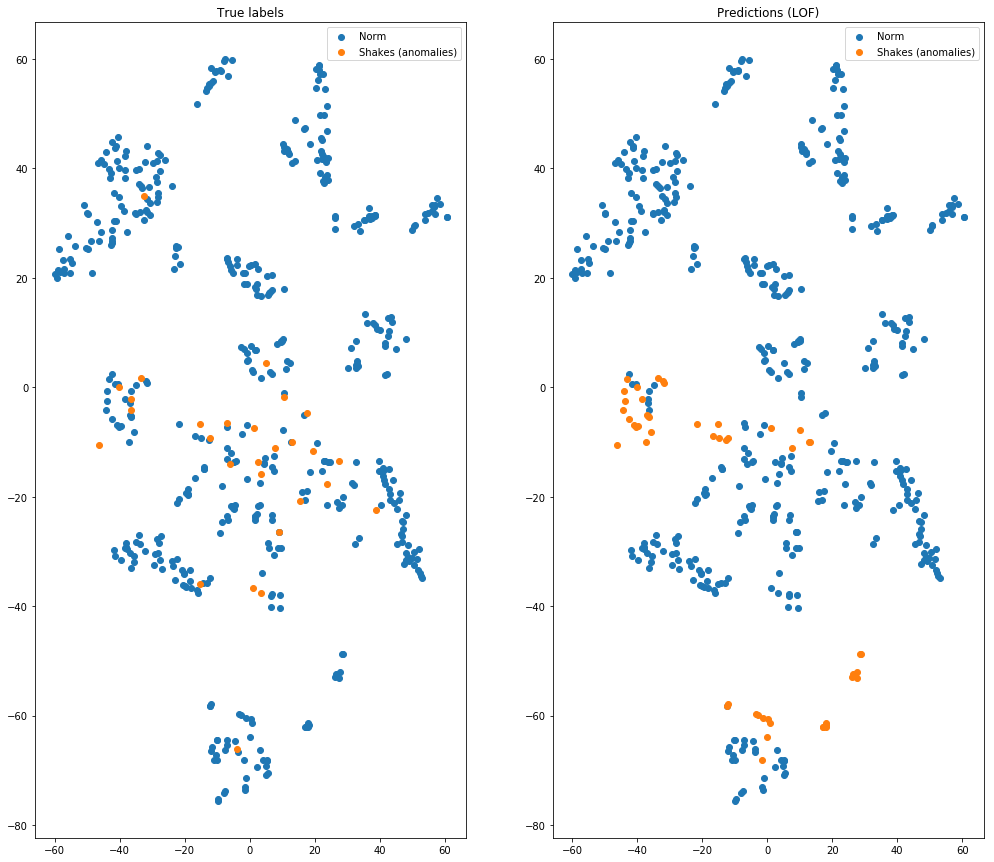

In [36]:
import numpy as np
plt.figure(figsize=(17, 15))

plt.subplot(121)
plt.title('True labels')
normals_idx = np.argwhere(y_test == 0).squeeze() # норма
anomalies_idx = np.argwhere(y_test == 1).squeeze() # землятрясения
plt.scatter(X_emb_test[normals_idx, 0], X_emb_test[normals_idx, 1], label='Norm')
plt.scatter(X_emb_test[anomalies_idx, 0], X_emb_test[anomalies_idx, 1], label='Shakes (anomalies)')
plt.legend()

plt.subplot(122)
plt.title('Predictions (LOF)')
normals_idx = np.argwhere(y_pred == 0).squeeze() # норма
anomalies_idx = np.argwhere(y_pred == 1).squeeze() # землятрясения
plt.scatter(X_emb_test[normals_idx, 0], X_emb_test[normals_idx, 1], label='Norm')
plt.scatter(X_emb_test[anomalies_idx, 0], X_emb_test[anomalies_idx, 1], label='Shakes (anomalies)')
plt.legend()